# Importação Das Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Funções Auxiliares

In [3]:
def describe_dist_var(dataframe_1,dataframe_2,var):
    distancias_var = {}
        
    for periodo in range(52):
        aux = []
        for list_1 in dataframe_1[var]:
            for list_2 in dataframe_2[var]:
                aux.append(math.fabs(list_1[periodo]-list_2[periodo]))
        distancias_var[f'x{periodo+1}'] = aux

    return pd.DataFrame(distancias_var)

In [4]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(52):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

In [5]:
def arrumaDataFrame(resultados):
    resultados_dataframe = {}
    for column in range(len(resultados.columns[:-5])):
        coluna_aux = []
        for element in range(len(resultados)):
            coluna_aux.append(np.array([float(elemento) for elemento in resultados.iloc[element,column][1:-1].split(',')]))
        
        resultados_dataframe[resultados.columns[column]] = coluna_aux


    for column in resultados.columns[3:]:
        resultados_dataframe[column] = resultados[column]


    return pd.DataFrame(resultados_dataframe)

In [6]:
def dataFrame_to_boxPlot(dataFrame,var):
    data = {}
    column_value = []
    column_x = []

    for column in range(len(dataFrame.columns)):
        column_value += list(dataFrame.iloc[:,column])
        column_x += [f'x{column+1}' for i in range(len(dataFrame))]

    data[var]=column_value
    data['x']=column_x
    return pd.DataFrame(data)

# Importação Dos Dados

In [7]:
resultados_np = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_np.csv").iloc[:,1:]
resultados_sar = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_sar.csv").iloc[:,1:]
resultados_treino = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_treino.csv").iloc[:,1:]

In [8]:
resultados_np = arrumaDataFrame(resultados_np)
resultados_sar = arrumaDataFrame(resultados_sar)
resultados_treino = arrumaDataFrame(resultados_treino)

# Análise Dos Resultados

## Análise do Resultados X

In [9]:
result_x_np = describe_var(resultados_np,'x')
result_x_sar = describe_var(resultados_sar,'x')
result_x_treino = describe_var(resultados_treino,'x')

In [10]:
boxPlot_x_np = dataFrame_to_boxPlot(result_x_np,'value')
boxPlot_x_sar = dataFrame_to_boxPlot(result_x_sar,'value')
boxPlot_x_treino = dataFrame_to_boxPlot(result_x_treino,'value')

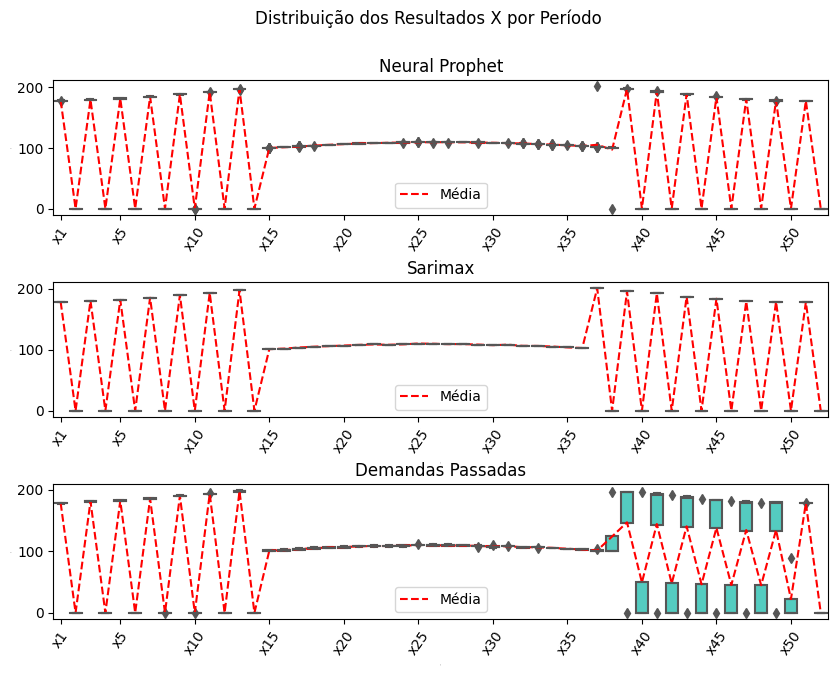

In [11]:
fig=plt.figure(figsize=(10,7))
fig.suptitle('Distribuição dos Resultados X por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_x_np,x='x',y='value',color='turquoise')
plt.plot(result_x_np.columns,result_x_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,2)
ax.set_title('Sarimax')
sns.boxplot(data=boxPlot_x_sar,x='x',y='value',color='turquoise')
plt.plot(result_x_sar.columns,result_x_sar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_sar.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,3)
ax.set_title('Demandas Passadas')
sns.boxplot(data=boxPlot_x_treino,x='x',y='value',color='turquoise')
plt.plot(result_x_treino.columns,result_x_treino.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_x_treino.columns)/5)+1)])
plt.legend()

In [12]:
result_s_np = describe_var(resultados_np,'s')
result_s_sar = describe_var(resultados_sar,'s')
result_s_treino = describe_var(resultados_treino,'s')

boxPlot_s_np = dataFrame_to_boxPlot(result_s_np,'value')
boxPlot_s_sar = dataFrame_to_boxPlot(result_s_sar,'value')
boxPlot_s_treino = dataFrame_to_boxPlot(result_s_treino,'value')

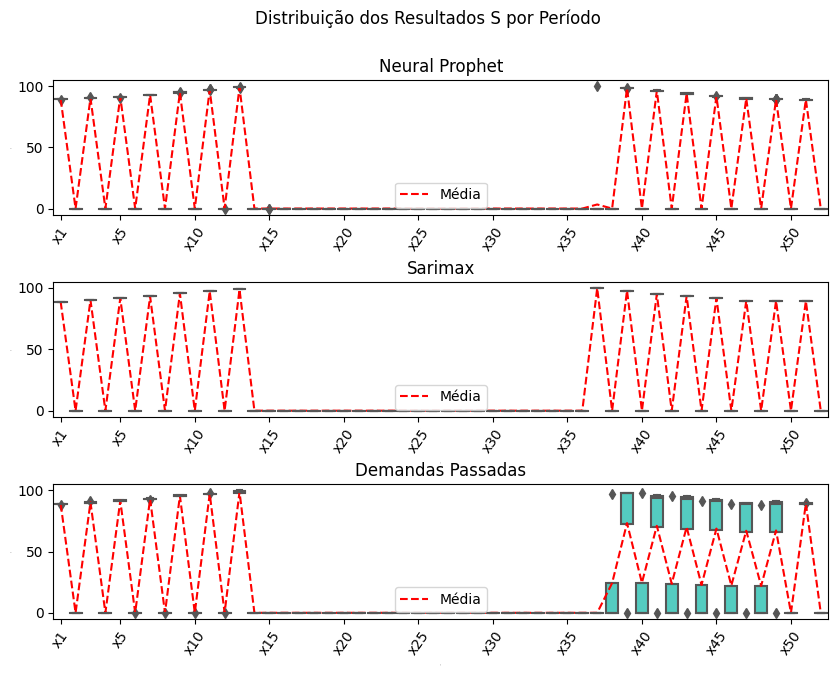

In [13]:
fig=plt.figure(figsize=(10,7))
fig.suptitle('Distribuição dos Resultados S por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_s_np,x='x',y='value',color='turquoise')
plt.plot(result_s_np.columns,result_s_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,2)
ax.set_title('Sarimax')
sns.boxplot(data=boxPlot_s_sar,x='x',y='value',color='turquoise')
plt.plot(result_s_sar.columns,result_s_sar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_sar.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,3)
ax.set_title('Demandas Passadas')
sns.boxplot(data=boxPlot_s_treino,x='x',y='value',color='turquoise')
plt.plot(result_s_treino.columns,result_s_treino.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(result_s_treino.columns)/5)+1)])
plt.legend()

In [14]:
dist_x_NS = describe_dist_var(resultados_np,resultados_sar,'x')
boxPlot_dist_x_NS = dataFrame_to_boxPlot(dist_x_NS,'dist')

dist_x_NT = describe_dist_var(resultados_np,resultados_treino,'x')
boxPlot_dist_x_NT = dataFrame_to_boxPlot(dist_x_NT,'dist')

dist_x_ST = describe_dist_var(resultados_sar,resultados_treino,'x')
boxPlot_dist_x_ST = dataFrame_to_boxPlot(dist_x_ST,'dist')

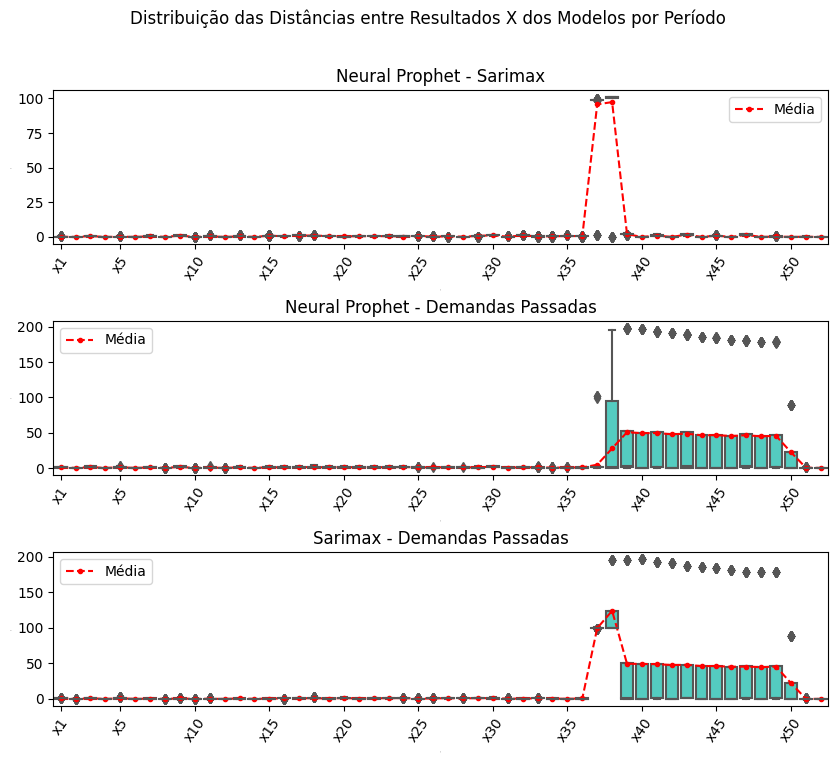

In [15]:
fig=plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0, hspace=0.5)
fig.suptitle('Distribuição das Distâncias entre Resultados X dos Modelos por Período')

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet - Sarimax')
sns.boxplot(data=boxPlot_dist_x_NS,x='x',y='dist',color='turquoise')
plt.plot(dist_x_NS.columns,dist_x_NS.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_x_NS.columns)/5)+1)])
plt.legend()

ax=fig.add_subplot(3,1,2)
ax.set_title('Neural Prophet - Demandas Passadas')
sns.boxplot(data=boxPlot_dist_x_NT,x='x',y='dist',color='turquoise')
plt.plot(dist_x_NT.columns,dist_x_NT.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_x_NT.columns)/5)+1)])
plt.legend()

ax=fig.add_subplot(3,1,3)
ax.set_title('Sarimax - Demandas Passadas')
sns.boxplot(data=boxPlot_dist_x_ST,x='x',y='dist',color='turquoise')
plt.plot(dist_x_ST.columns,dist_x_ST.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_x_ST.columns)/5)+1)])
plt.legend()

In [16]:
dist_s_NS = describe_dist_var(resultados_np,resultados_sar,'s')
boxPlot_dist_s_NS = dataFrame_to_boxPlot(dist_s_NS,'dist')

dist_s_NT = describe_dist_var(resultados_np,resultados_treino,'s')
boxPlot_dist_s_NT = dataFrame_to_boxPlot(dist_s_NT,'dist')

dist_s_ST = describe_dist_var(resultados_sar,resultados_treino,'s')
boxPlot_dist_s_ST = dataFrame_to_boxPlot(dist_s_ST,'dist')

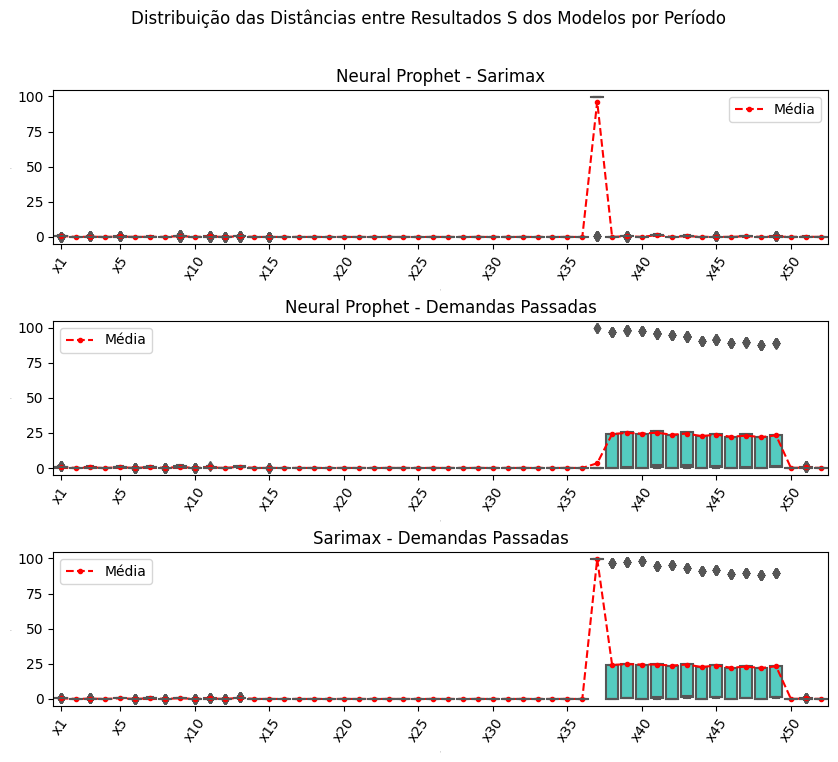

In [17]:
fig=plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0, hspace=0.5)
fig.suptitle('Distribuição das Distâncias entre Resultados S dos Modelos por Período')

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet - Sarimax')
sns.boxplot(data=boxPlot_dist_s_NS,x='x',y='dist',color='turquoise')
plt.plot(dist_s_NS.columns,dist_s_NS.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_s_NS.columns)/5)+1)])
plt.legend()

ax=fig.add_subplot(3,1,2)
ax.set_title('Neural Prophet - Demandas Passadas')
sns.boxplot(data=boxPlot_dist_s_NT,x='x',y='dist',color='turquoise')
plt.plot(dist_s_NT.columns,dist_s_NT.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_s_NT.columns)/5)+1)])
plt.legend()

ax=fig.add_subplot(3,1,3)
ax.set_title('Sarimax - Demandas Passadas')
sns.boxplot(data=boxPlot_dist_s_ST,x='x',y='dist',color='turquoise')
plt.plot(dist_s_ST.columns,dist_s_ST.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_s_ST.columns)/5)+1)])
plt.legend()

## Análise do Resultados RunTime

In [18]:
df_RunTime = pd.DataFrame({'RunTime':list(resultados_np['RunTime'].values)+list(resultados_sar['RunTime'].values)+list(resultados_treino['RunTime'].values),
                           'Alg': ['Neural Prophet' for i in range(len(resultados_np))]+['Sarimax' for i in range(len(resultados_sar))]+['Demandas Passadas' for i in range(len(resultados_treino))]
                         })

[]

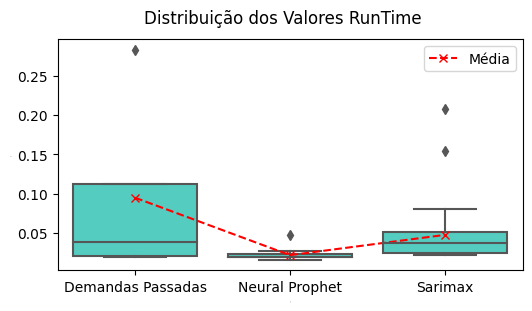

In [19]:
fig=plt.figure(figsize=(6,3))
fig.suptitle('Distribuição dos Valores RunTime')

sns.boxplot(df_RunTime.sort_values('Alg'), x='Alg',y='RunTime',color='turquoise')
plt.plot(df_RunTime.groupby('Alg').mean().sort_index(),color='red',marker='x',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.legend()

plt.plot()

## Análise do Resultados OBbjBound/ OBbjVal

In [20]:
df_objVal = pd.DataFrame({'ObjVal':list(resultados_np['ObjVal'].values)+list(resultados_sar['ObjVal'].values)+list(resultados_treino['ObjVal'].values),
             'Alg': ['Neural Prophet' for i in range(len(resultados_np))]+['Sarimax' for i in range(len(resultados_sar))]+['Demandas Passadas' for i in range(len(resultados_treino))]
             })

In [21]:
df_ObjBound = pd.DataFrame({'ObjBound':list(resultados_np['ObjBound'].values)+list(resultados_sar['ObjBound'].values)+list(resultados_treino['ObjBound'].values),
             'Alg': ['Neural Prophet' for i in range(len(resultados_np))]+['Sarimax' for i in range(len(resultados_sar))]+['Demandas Passadas' for i in range(len(resultados_treino))]
             })

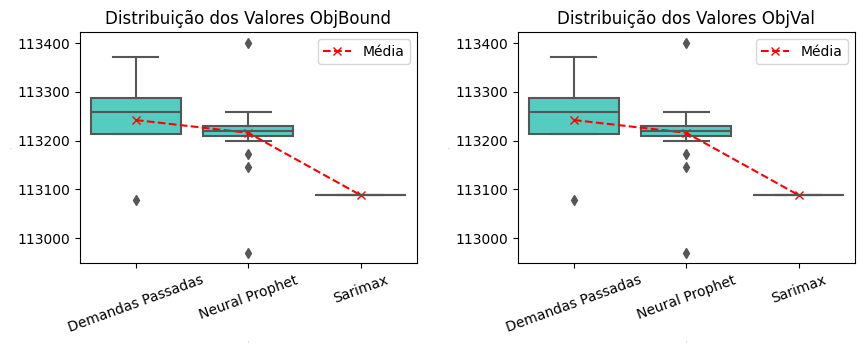

In [22]:
fig=plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=0.3, hspace=0)

ax=fig.add_subplot(1,2,1)
ax.set_title('Distribuição dos Valores ObjBound')
sns.boxplot(df_ObjBound.sort_values('Alg'), x='Alg',y='ObjBound',color='turquoise')
plt.plot(df_ObjBound.groupby('Alg').mean().sort_index(),color='red',marker='x',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.legend()
for tick in ax.get_xticklabels():
    tick.set_rotation(20)

ax=fig.add_subplot(1,2,2)
ax.set_title('Distribuição dos Valores ObjVal')
sns.boxplot(df_objVal.sort_values('Alg'), x='Alg',y='ObjVal',color='turquoise')
plt.plot(df_objVal.groupby('Alg').mean().sort_index(),color='red',marker='x',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.legend()
for tick in ax.get_xticklabels():
    tick.set_rotation(20)


## Análise de Correlação Entre Diferenças de Resultados e Previsões

Esta em desenvolvimento

In [23]:
past = 'C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/'

In [24]:
previsoes_np = {}
previsoes = []
for index in range(30):
    with open(past+f'Prev_pro/Previsao_pro{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_np['x'] = previsoes
previsoes_np = pd.DataFrame(previsoes_np)

In [25]:
previsoes_sar = {}
previsoes = []
for index in range(30):
    with open(past+f'Prev_sar/Previsao_sar{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_sar['x'] = previsoes
previsoes_sar = pd.DataFrame(previsoes_sar)
previsoes_sar.head()

,x
0,"[89.78684937564663, 88.54540168197997, 90.3517..."
1,"[89.78684937564663, 88.54540168197997, 90.3517..."
2,"[89.78684937564663, 88.54540168197997, 90.3517..."
3,"[89.78684937564663, 88.54540168197997, 90.3517..."
4,"[89.78684937564663, 88.54540168197997, 90.3517..."


In [26]:
dist_prev_NS = describe_dist_var(previsoes_np,previsoes_sar,'x')
dist_prev_NT = describe_dist_var(previsoes_np,resultados_treino,'x')
dist_prev_ST = describe_dist_var(previsoes_sar,resultados_treino,'x')

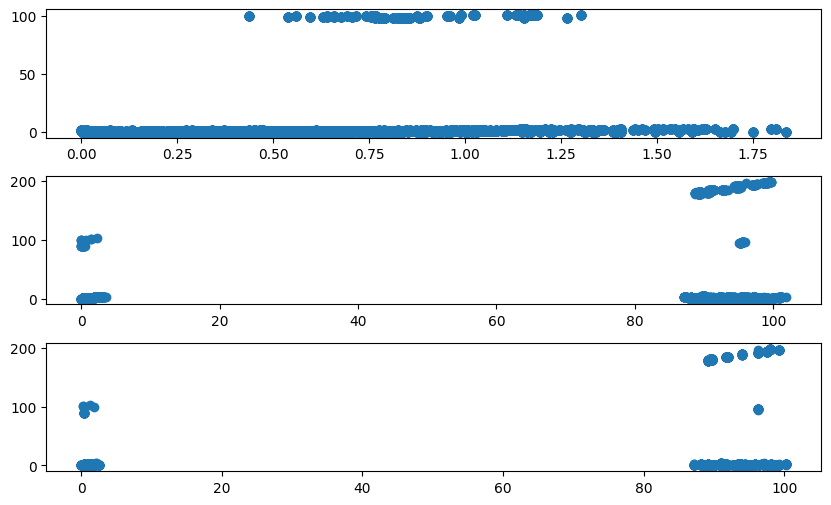

In [27]:
fig=plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace=0, hspace=0.3)

ax=fig.add_subplot(3,1,1)
plt.scatter(dataFrame_to_boxPlot(dist_prev_NS,'dist')['dist'],dataFrame_to_boxPlot(dist_x_NS,'dist')['dist'])

ax=fig.add_subplot(3,1,2)
plt.scatter(dataFrame_to_boxPlot(dist_prev_NT,'dist')['dist'],dataFrame_to_boxPlot(dist_x_NT,'dist')['dist'])

ax=fig.add_subplot(3,1,3)
plt.scatter(dataFrame_to_boxPlot(dist_prev_ST,'dist')['dist'],dataFrame_to_boxPlot(dist_x_NT,'dist')['dist'])


Como é feito essa correalção? suponha duas previsões, [1,2,1,5] e [2,1,3,2], no primeiro componente temos uma diferença de 1. Cada previsão dessa terá um resultado associado, um vetor x, vetor s, ..., então pegaremos o vetor x associados a cada um respectivamente, [2,2,1,5] e [3,2,1,4] então faremos a diferença do primeiro componente, 1 e associamos a diferença que foi feita a essa primeira componente e as previsões associados a eles. Obs: Isso é feito para toda componente, isso so possível pois os vetores resultados do MIP possuem a mesma dimensão dos de previsão.